In [1]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from geopy.distance import great_circle
import os

In [2]:
official_filename = "Olomouc_supermarkets_2018.shp"
OSM_filename = "olomouc_cz_2019_1600m_buffer.gpkg"
POIs_name = "fresh_food_market"

gdf = gpd.read_file(OSM_filename, layer='destinations')
gdf_osm = gdf[gdf['dest_name']==POIs_name]
gdf_official = gpd.GeoDataFrame.from_file(official_filename)
print("number of OSM points: " ,len(gdf_osm))
print("number of Official points: ", len(gdf_official))


number of OSM points:  67
number of Official points:  63


In [3]:
#Project gdf_osm to the crs of the official layer
gdf_osm = gdf_osm.to_crs(gdf_official.crs)
print(gdf_osm.crs)

epsg:5514


In [5]:
#Write data to shapefile
from os.path import join as pjoin
filename = "olomouc_poi_official.shp"
path_to_file = pjoin("output", filename)

if os.path.isfile(path_to_file):
    print ("File exist")
else:
    gdf_official.to_file(path_to_file)
    
filename = "olomouc_poi_osm.shp"
path_to_file = pjoin("output", filename)
#gdf_osm = pd.merge(gdf_osm, gdf_osm.bounds, left_index=True, right_index=True)


if os.path.isfile(path_to_file):
    print ("File exist")
else:
    gdf_osm.to_file(path_to_file)


In [13]:
buff = 5
percent_list = []
percent_dict = {}

while buff<100:
    OSM_buffer = gdf_osm
    OSM_buffer['geometry'] = OSM_buffer.geometry.buffer(buff)
    OP_buffer =gdf_official
    OP_buffer['geometry'] = OP_buffer.geometry.buffer(buff)
    
    print("Buffer: ", str(buff))
    
    #Calculate percent of OSM points within Official points 100m buffer
    mask = gdf_osm['geometry'].intersects(OP_buffer['geometry'].unary_union)
    print("intersection: ",len(gdf_osm[mask]))
    print("percent of OSM points", str(len(gdf_osm[mask])*100/len(gdf_osm)))
    
    #Calculate percent of Official Point within OSM points 100m buffer
    mask = gdf_official['geometry'].intersects(OSM_buffer['geometry'].unary_union)
    print("intersection: ",len(gdf_official[mask]))
    print("percent of Official Point: ", str(len(gdf_official[mask])*100/len(gdf_official)))
    print("\n")
    
    buff+=5
    

Buffer:  5
intersection:  66
percent of OSM points 98.50746268656717
intersection:  61
percent of Official Point:  96.82539682539682


Buffer:  10
intersection:  66
percent of OSM points 98.50746268656717
intersection:  61
percent of Official Point:  96.82539682539682


Buffer:  15
intersection:  66
percent of OSM points 98.50746268656717
intersection:  61
percent of Official Point:  96.82539682539682


Buffer:  20
intersection:  67
percent of OSM points 100.0
intersection:  61
percent of Official Point:  96.82539682539682


Buffer:  25
intersection:  67
percent of OSM points 100.0
intersection:  61
percent of Official Point:  96.82539682539682


Buffer:  30
intersection:  67
percent of OSM points 100.0
intersection:  61
percent of Official Point:  96.82539682539682


Buffer:  35
intersection:  67
percent of OSM points 100.0
intersection:  62
percent of Official Point:  98.41269841269842


Buffer:  40
intersection:  67
percent of OSM points 100.0
intersection:  62
percent of Official P

In [6]:
#Calculate number of gdf_osm intersect with gdf_official
mask1 = gdf_osm['geometry'].intersects(gdf_official['geometry'].unary_union)

print("number of intersection items: ",len(gdf_osm[mask1]))
print("Percentage: ",len(gdf_osm[mask1])*100/len(gdf_osm) )

number of intersection items:  0
Percentage:  0.0


In [7]:
#Draw 100m buffer around OSM points; draw 100m buffer around official points
OSM_buffer = gdf_osm
OSM_buffer['geometry'] = OSM_buffer.geometry.buffer(100)
OP_buffer =gdf_official
OP_buffer['geometry'] = OP_buffer.geometry.buffer(100)


In [8]:
#Calculate percent of OSM points within Official points 100m buffer
mask = gdf_osm['geometry'].intersects(OP_buffer['geometry'].unary_union)
print("intersection: ",len(gdf_osm[mask]))
print("percent of OSM points", str(len(gdf_osm[mask])*100/len(gdf_osm)))

intersection:  45
percent of OSM points 67.16417910447761


In [9]:
#Calculate percent of Official Point within OSM points 100m buffer
mask = gdf_official['geometry'].intersects(OSM_buffer['geometry'].unary_union)
print("intersection: ",len(gdf_official[mask]))
print("percent of Official Point: ", str(len(gdf_official[mask])*100/len(gdf_official)))

intersection:  46
percent of Official Point:  73.01587301587301


In [10]:
#Calculate distance to all Official polygons and pick the min
def min_distance(gdf_osm, gdf_official):
    nearest_dists = []
    for item in gdf_osm.geometry:
        nearest_dist = gdf_official.distance(item).min()
        nearest_dists.append(nearest_dist)
    gdf_osm['nearest_distance'] = nearest_dists
    print(gdf_osm['nearest_distance'])

0        0.000000
1     1996.712643
2        0.000000
3        0.000000
4        0.000000
         ...     
62      66.048072
63     281.553036
64       0.000000
65       0.000000
66       0.000000
Name: nearest_distance, Length: 67, dtype: float64


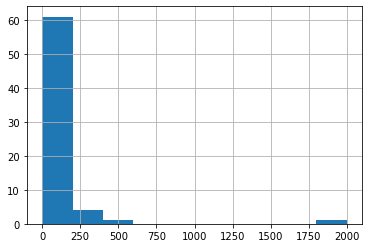

mean nearest distance:  69.84908280634559
median nearest distance:  0.0


In [11]:
min_distance(gdf_osm,gdf_official)
#Graphing the histogram of distance from gdf_osm to nearest Official points
ax = gdf_osm['nearest_distance'].hist()
plt.show()

mean_dist = gdf_osm['nearest_distance'].mean()
print("mean nearest distance: ",mean_dist)

median_dist = gdf_osm['nearest_distance'].median()
print("median nearest distance: ", median_dist)